In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, roc_curve
from myfunctions import prediction_matrices

import warnings
warnings.filterwarnings("ignore")

First, we load the final DataFrame from notebook 4.

In [2]:
df_train = pd.read_pickle('./data/df_train.pkl')
df_test = pd.read_pickle('./data/df_test.pkl')

# Assign Target and Features

In [3]:
X_train = df_train.drop("churn_risk_score", axis = 1)
y_train = df_train["churn_risk_score"]

X_test = df_test.drop("churn_risk_score", axis = 1)
y_test = df_test["churn_risk_score"]

Convert target into integer for compatibility of models

In [5]:
#df_train = df_train.astype(float)
y_train = y_train.astype(int)

y_test = y_test.astype(int)

# Logistic Regression

In [6]:
# Instatiate model and fit on train data

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

## Prediction scores and matrices

Report on train set : 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83     12798
           1       0.85      0.87      0.86     14972

    accuracy                           0.85     27770
   macro avg       0.85      0.85      0.85     27770
weighted avg       0.85      0.85      0.85     27770

--------------------------------------------------------------------------------
Accuracy on test set: 0.86
ROC on test set: 0.95
Report on test set : 
               precision    recall  f1-score   support

           0       0.86      0.81      0.84      3167
           1       0.85      0.89      0.87      3779

    accuracy                           0.86      6946
   macro avg       0.86      0.85      0.85      6946
weighted avg       0.86      0.86      0.86      6946



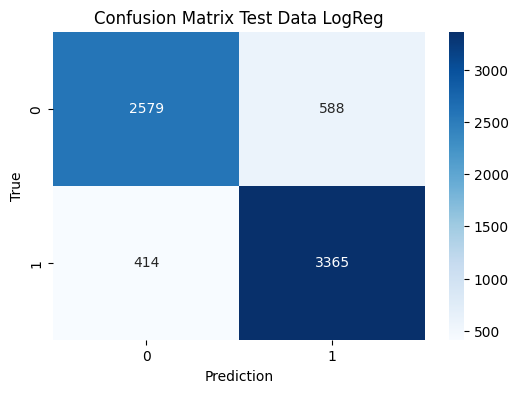

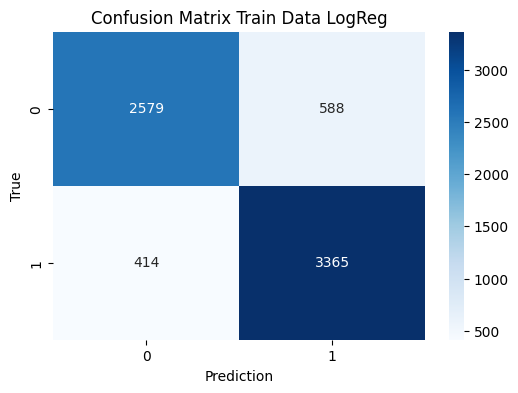

In [7]:
prediction_matrices(model = logreg, X_test = X_test, X_train= X_train, y_test= y_test, y_train = y_train, model_name= "LogReg")

Prediction with logistic regression results in good scores.

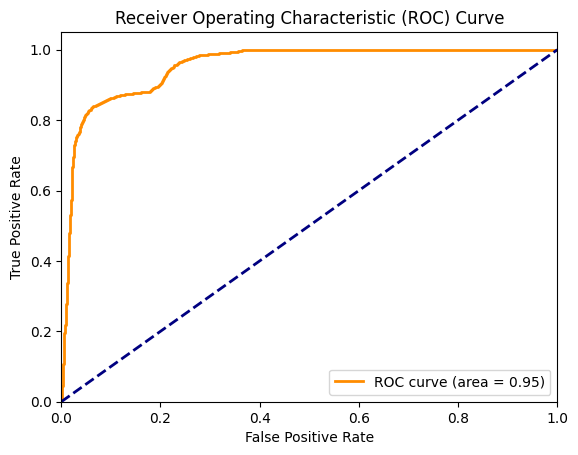

In [8]:
# ROC Curve
y_pred_roc = logreg.predict_proba(X_test)[:, 1] # Probability of positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_roc)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



ROC curve results in very good scores

## Save Model

In [9]:
# Save model
with open('./model/model_logreg.pkl', 'wb') as file:
    pickle.dump(logreg, file)

## Feature Importance

Feature Importance:
                                        Feature  Importance
31                    feedback_Reasonable Price    3.963418
33               feedback_User Friendly Website    3.955433
29            feedback_Products always in Stock    3.818006
30               feedback_Quality Customer Care    3.772606
34                          membership_category    1.531573
4                              points_in_wallet    0.450636
25                    complaint_status_Unsolved    0.177564
27                feedback_Poor Product Quality    0.169683
22              complaint_status_Not Applicable    0.139844
8                                gender_Unknown    0.127142
23                      complaint_status_Solved    0.095844
26               feedback_Poor Customer Service    0.095051
24         complaint_status_Solved in Follow-up    0.080989
15         preferred_offer_types_Without Offers    0.074525
32                        feedback_Too many ads    0.073330
20                  

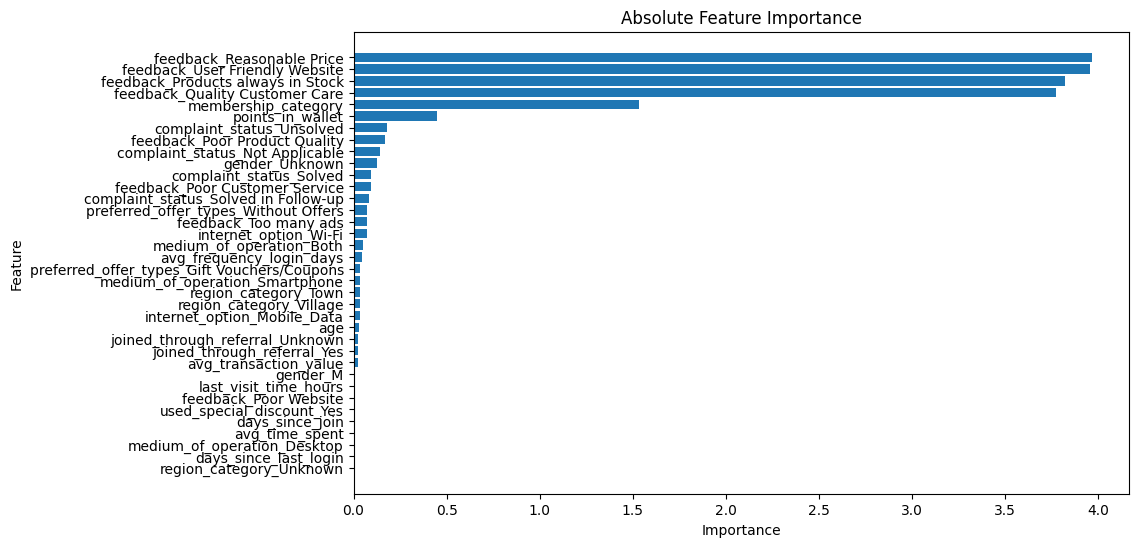

In [13]:
# Read coefficents of logistic regression which contain the feature importance of this model
coefficients = logreg.coef_[0]
# Create list of absolute feature importance
feature_importance_abs = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(coefficients)
})
# Sort absolut feature importance in descending order
feature_importance_abs = feature_importance_abs.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance_abs)


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_abs['Feature'], feature_importance_abs['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Absolute Feature Importance')
plt.gca().invert_yaxis()  # invert axis for most importance feature at top
plt.show()

                                        Feature  Importance
27                feedback_Poor Product Quality    0.169683
26               feedback_Poor Customer Service    0.095051
15         preferred_offer_types_Without Offers    0.074525
32                        feedback_Too many ads    0.073330
16                     medium_of_operation_Both    0.049352
3                      avg_frequency_login_days    0.045413
18               medium_of_operation_Smartphone    0.034687
11                      region_category_Village    0.033065
19                  internet_option_Mobile_Data    0.032408
0                                           age    0.029950
12              joined_through_referral_Unknown    0.026660
13                  joined_through_referral_Yes    0.026002
7                                      gender_M    0.009352
5                         last_visit_time_hours    0.008205
1                                avg_time_spent    0.002538
17                  medium_of_operation_

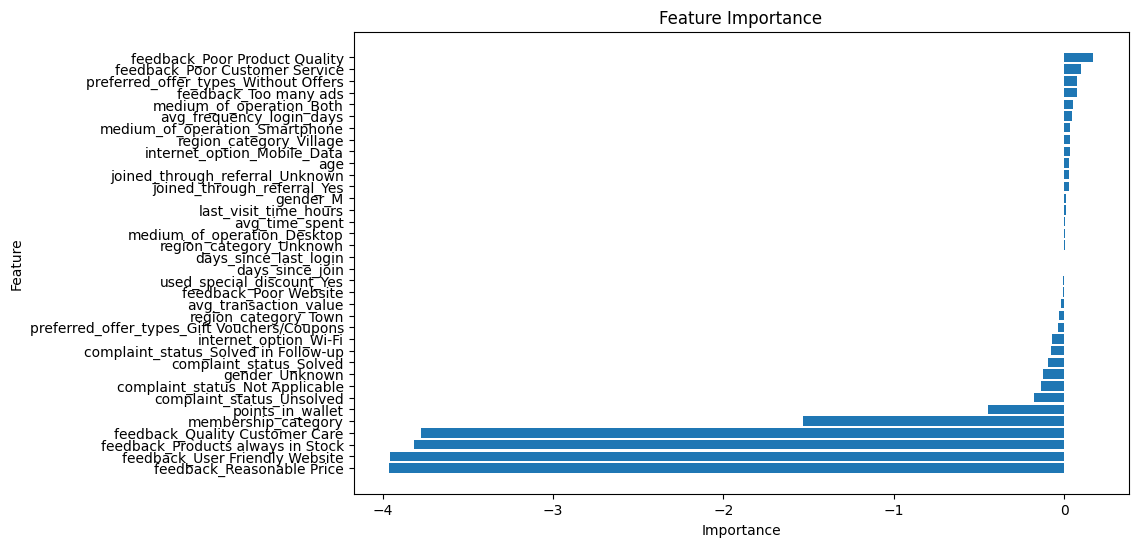

In [47]:
# Create list of feature importance (+/-)
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': (coefficients)
    })
# Sort feature importance in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # invert axis for most importance feature at top
plt.show()

Group feature importance by feature name as if not on-hot-encoded  
We want to know how important the origin feature before one-hot-encoding is.

In [36]:
feature_importance.sort_values(by='Feature')

,Feature,Importance
0,age,0.029950
3,avg_frequency_login_days,0.045413
1,avg_time_spent,0.002538
2,avg_transaction_value,-0.022721
22,complaint_status_Not Applicable,-0.139844
23,complaint_status_Solved,-0.095844
24,complaint_status_Solved in Follow-up,-0.080989
25,complaint_status_Unsolved,-0.177564
6,days_since_join,-0.004348
35,days_since_last_login,-0.001480


In [37]:
original_features = pd.read_pickle('./data/df_train_KNN.pkl')
original_features.drop('churn_risk_score', axis=1, inplace=True)
original_features = original_features.columns
print(original_features) 

Index(['age', 'gender', 'region_category', 'membership_category',
       'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount', 'complaint_status',
       'feedback', 'last_visit_time_hours', 'days_since_join'],
      dtype='object')


In [48]:
for feature in feature_importance["Feature"]:
   for original in original_features:
      if original in feature:
          print(original+feature)
          #feature_importance["Feature"] = original
#print(feature_importance)
          
          
          #startswith

feedbackfeedback_Poor Product Quality
feedbackfeedback_Poor Customer Service
preferred_offer_typespreferred_offer_types_Without Offers
feedbackfeedback_Too many ads
medium_of_operationmedium_of_operation_Both
avg_frequency_login_daysavg_frequency_login_days
medium_of_operationmedium_of_operation_Smartphone
ageregion_category_Village
region_categoryregion_category_Village
internet_optioninternet_option_Mobile_Data
ageage
joined_through_referraljoined_through_referral_Unknown
joined_through_referraljoined_through_referral_Yes
gendergender_M
last_visit_time_hourslast_visit_time_hours
avg_time_spentavg_time_spent
medium_of_operationmedium_of_operation_Desktop
region_categoryregion_category_Unknown
days_since_last_logindays_since_last_login
days_since_joindays_since_join
used_special_discountused_special_discount_Yes
feedbackfeedback_Poor Website
avg_transaction_valueavg_transaction_value
region_categoryregion_category_Town
preferred_offer_typespreferred_offer_types_Gift Vouchers/Coupons
in

In [42]:
for feature in original_features:
    importance.groupby(feature in feature_importance['Feature']).sum()

    print(importance)

KeyError: False

In [ ]:
substring = 'feedback_Too many ads'


In [38]:
# Create new DataFrame to save the importance of the origin feature
original_feature_importances = pd.DataFrame(columns=['Feature', 'Importance'])

original_feature_importances = feature_importance.groupby(original_features in feature_importance['Feature']).sum().sort_values(by='Importance', ascending=False)
original_feature_importances.drop(original_feature_importances.columns[0], axis=1, inplace=True)
# Reset Index
original_feature_importances = original_feature_importances.reset_index()
original_feature_importances

TypeError: unhashable type: 'Index'

In [34]:
# Create new DataFrame to save the importance of the origin feature
original_feature_importances = pd.DataFrame(columns=['Feature', 'Importance'])
original_feature_importances = feature_importance.groupby(feature_importance['Feature'].str.split('_').str[0]).sum().sort_values(by='Importance', ascending=False)
original_feature_importances.drop(original_feature_importances.columns[0], axis=1, inplace=True)
# Reset Index
original_feature_importances = original_feature_importances.reset_index()
original_feature_importances

,Feature,Importance
0,medium,0.085667
1,joined,0.052662
2,preferred,0.038470
3,age,0.029950
4,avg,0.025230
5,last,0.008205
6,region,-0.000263
7,days,-0.005828
8,used,-0.006196
9,internet,-0.039195


In [20]:
# Create new DataFrame to save the importance of the origin feature
original_feature_importances = pd.DataFrame(columns=['Feature', 'Importance'])

# 
# Sum the total importance for each feature. To get the feature name we applied the string split 
for feature, group in feature_importance.groupby(feature_importance['Feature'].str.split('_').str[0]):
    total_importance = group['Importance'].sum()
    original_feature_importances = pd.concat([original_feature_importances, pd.DataFrame([{'Feature': feature, 'Importance': total_importance}])], ignore_index=True)

original_feature_importances = original_feature_importances.sort_values(by='Importance', ascending=False)

# Jetzt enthält `original_feature_importances` die gesamte Wichtigkeit für jedes ursprüngliche Feature
print(original_feature_importances)

       Feature  Importance
9       medium    0.085667
7       joined    0.052662
12   preferred    0.038470
0          age    0.029950
1          avg    0.025230
8         last    0.008205
13      region   -0.000263
3         days   -0.005828
14        used   -0.006196
6     internet   -0.039195
5       gender   -0.117790
11      points   -0.450636
2    complaint   -0.494241
10  membership   -1.531573
4     feedback  -15.178793


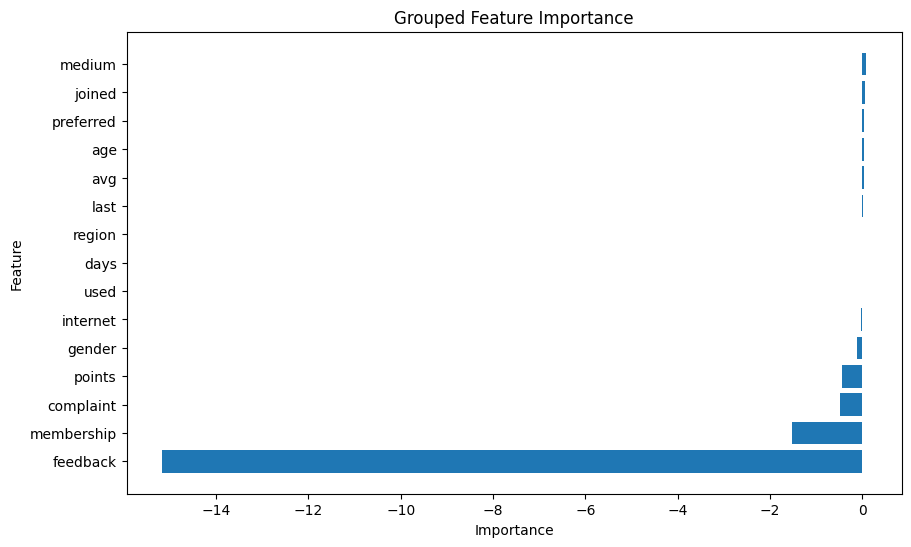

In [35]:
plt.figure(figsize=(10, 6))
plt.barh(original_feature_importances['Feature'], original_feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Grouped Feature Importance')
plt.gca().invert_yaxis()  # Umkehr der Achsen, damit die wichtigsten Features oben sind
plt.show()

# todo
- feature importance for dropped features during one-hot-encoding (does feature importance change when other categories of the same feature are dropped?)
- how to correctly aggregate one-hot-encoded features for feature importance: sum, mean?


In [37]:
# create a data set with the predicted values for evaluation of test-data:
df_test_eval = df_test.copy()
y_pred = logreg.predict(X_test)
df_test_eval['y_pred'] = y_pred

In [38]:
# create a data set with the predicted values for evaluation of  train-test:
df_train_eval = df_train.copy()
y_pred_train = logreg.predict(X_train)
df_train_eval['y_pred'] = y_pred_train

In [39]:
# check if subfolder exists:
if not os.path.exists('./data/eval'):
        os.makedirs('./data/eval')

# write the dataframes with prediction outcome for next notebook 
df_train_eval.to_pickle('./data/eval/df_train_eval.pkl')
df_test_eval.to_pickle('./data/eval/df_test_eval.pkl')